## Load data

In [2]:
!pwd

/notebooks/W251_FinalProject/notebooks_files


In [3]:
%cd ..

/notebooks/W251_FinalProject


In [2]:
!git clone https://github.com/sunh0003/W251_FinalProject.git

fatal: destination path 'W251_FinalProject' already exists and is not an empty directory.


In [4]:
%mkdir data

In [4]:
%cd W251_FinalProject

/notebooks/W251_FinalProject


In [5]:
%cd Kaggle

/notebooks/W251_FinalProject/Kaggle


In [7]:
%mkdir /notebooks/W251_FinalProject/data/train

In [8]:
from shutil import unpack_archive
unpack_archive('train1.zip', '/notebooks')
unpack_archive('train2.zip', '/notebooks')
unpack_archive('train3.zip', '/notebooks')
unpack_archive('validation.zip', '/notebooks')

In [8]:
%mv /notebooks/train1/fear /notebooks/data/train
%mv /notebooks/train1/happy /notebooks/data/train
%mv /notebooks/train2/netural /notebooks/data/train
%mv /notebooks/train2/sad /notebooks/data/train
%mv /notebooks/train2/suprise /notebooks/data/train
%mv /notebooks/train3/angry /notebooks/data/train
%mv /notebooks/train3/disgust /notebooks/data/train
%mv /notebooks/validation /notebooks/data

mv: cannot move '/notebooks/train1/fear' to '/notebooks/data/train/fear': Directory not empty
mv: cannot move '/notebooks/train1/happy' to '/notebooks/data/train/happy': Directory not empty
mv: cannot stat '/notebooks/train2/netural': No such file or directory
mv: cannot move '/notebooks/train2/sad' to '/notebooks/data/train/sad': Directory not empty
mv: cannot stat '/notebooks/train2/suprise': No such file or directory
mv: cannot move '/notebooks/train3/angry' to '/notebooks/data/train/angry': Directory not empty
mv: cannot move '/notebooks/train3/disgust' to '/notebooks/data/train/disgust': Directory not empty
mv: cannot move '/notebooks/validation' to '/notebooks/data/validation': Directory not empty


In [9]:
!pwd

/notebooks/W251_FinalProject/Kaggle


## Model

In [10]:
!pip install --upgrade pip

Requirement already up-to-date: pip in /usr/local/lib/python3.5/dist-packages (20.1.1)


In [11]:
!pip3 install pillow

In [69]:
! rmdir /notebooks/data/validation/.ipynb_checkpoints

rmdir: failed to remove '/notebooks/data/validation/.ipynb_checkpoints': No such file or directory


### Re-run from here!

In [1]:
# display some images for every different expression

import numpy as np
import seaborn as sns
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import os


# size of the image: 48*48 pixels
pic_size = 48

# input path for the images
base_path = "/notebooks/data9cls/"

plt.figure(0, figsize=(12,20))
cpt = 0

for expression in os.listdir(base_path + "train/"):
    for i in range(1,6):
        cpt = cpt + 1
        plt.subplot(9,5,cpt)
        img = load_img(base_path + "train/" + expression + "/" +os.listdir(base_path + "train/" + expression)[i], target_size=(pic_size, pic_size))
        plt.imshow(img, cmap="gray")

plt.tight_layout()
plt.show()

Using TensorFlow backend.


<Figure size 1200x2000 with 45 Axes>

In [2]:
# count number of train images for each expression

for expression in os.listdir(base_path + "train"):
    print(str(len(os.listdir(base_path + "train/" + expression))) + " " + expression + " images")


655 distracted images
436 disgust images
4938 sad images
648 confused images
3993 angry images
3205 surprise images
4103 fear images
7164 happy images
4982 neutral images


In [3]:
# count number of validation images for each expression

for expression in os.listdir(base_path + "validation"):
    print(str(len(os.listdir(base_path + "validation/" + expression))) + " " + expression + " images")

164 distracted images
111 disgust images
1139 sad images
162 confused images
960 angry images
797 surprise images
1018 fear images
1825 happy images
1216 neutral images


In [4]:
from keras.preprocessing.image import ImageDataGenerator

# number of images to feed into the NN for every batch
batch_size = 128

datagen_train = ImageDataGenerator()
datagen_validation = ImageDataGenerator()

train_generator = datagen_train.flow_from_directory(base_path + "train",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

validation_generator = datagen_validation.flow_from_directory(base_path + "validation",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 30124 images belonging to 9 classes.
Found 7392 images belonging to 9 classes.


In [5]:
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam

# number of possible label values
nb_classes = 9

# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(nb_classes, activation='softmax'))

opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 128)       512       
__________

In [7]:
steps_per_epoch=train_generator.n//train_generator.batch_size

In [8]:
validation_steps = validation_generator.n/validation_generator.batch_size
validation_steps

57.75

In [9]:
%%time

# number of epochs to train the NN
epochs = 50

from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history = model.fit_generator(generator=train_generator,
                                steps_per_epoch=train_generator.n//train_generator.batch_size,
                                epochs=epochs,
                                validation_data = validation_generator,
                                validation_steps = validation_generator.n//validation_generator.batch_size,
                                callbacks=callbacks_list
                                )

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
235/235 [==============================] - 559s 2s/step - loss: 2.1627 - acc: 0.2170 - val_loss: 1.8065 - val_acc: 0.3010

Epoch 00001: val_acc improved from -inf to 0.30099, saving model to model_weights.h5
Epoch 2/50
235/235 [==============================] - 556s 2s/step - loss: 1.8594 - acc: 0.3038 - val_loss: 1.7237 - val_acc: 0.3495

Epoch 00002: val_acc improved from 0.30099 to 0.34953, saving model to model_weights.h5
Epoch 3/50
235/235 [==============================] - 553s 2s/step - loss: 1.7357 - acc: 0.3457 - val_loss: 1.7251 - val_acc: 0.3504

Epoch 00003: val_acc improved from 0.34953 to 0.35036, saving model to model_weights.h5
Epoch 4/50
235/235 [==============================] - 553s 2s/step - loss: 1.6427 - acc: 0.3792 - val_loss: 1.5967 - val_acc: 0.4020

Epoch 00004: val_acc improved from 0.35036 to 0.40198, saving model to model_weights.h5
Epoch 5/50
235/235 [==============================] - 553s 2s/step 

In [10]:
#model save
SAVER = "../notebooks/model_save"
model.save(os.path.join(SAVER, "kaggle_model_9cls.h5"))

In [209]:
# serialize model structure to JSON
# model_json = model.to_json()
# with open("model.json", "w") as json_file:
#     json_file.write(model_json)

## Analyze the result

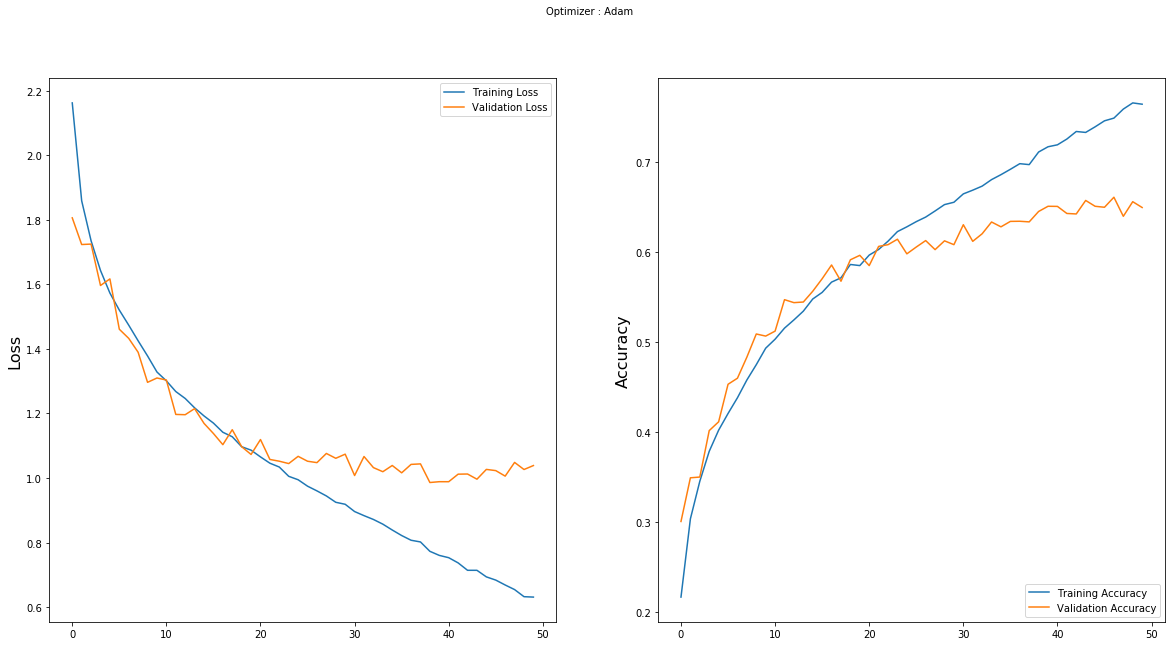

In [11]:
# plot the evolution of Loss and Acuracy on the train and validation sets

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()


## Confusion Matrix

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
steps = validation_generator.n//validation_generator.batch_size +1
predictions = model.predict_generator(generator=validation_generator, steps=steps)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = validation_generator.classes

cnf_matrix = confusion_matrix(y_test, y_pred)

cnf_matrix

array([[ 54,   0,   1,   1,  55, 354, 341, 139,  15],
       [ 13,   0,   0,   0,  10,  23,  80,  35,   1],
       [  9,   0,   0,   0,   9,   7,  57,  28,   1],
       [ 14,   0,   0,   1,  12,  16,  94,  26,   1],
       [ 70,   1,   3,   1, 111,  40, 248, 535,   9],
       [405,   0,  14,   1, 210, 103, 149, 338, 605],
       [219, 172,  73, 149, 274,  32,  68, 194,  35],
       [ 58,   2,   4,   0, 289, 535,  75, 139,  37],
       [ 16,   0,   1,   0,  15, 668,  28,  55,  14]])

In [14]:
print(validation_generator.class_indices)

{'confused': 1, 'distracted': 3, 'neutral': 6, 'happy': 5, 'angry': 0, 'surprise': 8, 'fear': 4, 'sad': 7, 'disgust': 2}


In [16]:
cnf_matrix

array([[ 54,   0,   1,   1,  55, 354, 341, 139,  15],
       [ 13,   0,   0,   0,  10,  23,  80,  35,   1],
       [  9,   0,   0,   0,   9,   7,  57,  28,   1],
       [ 14,   0,   0,   1,  12,  16,  94,  26,   1],
       [ 70,   1,   3,   1, 111,  40, 248, 535,   9],
       [405,   0,  14,   1, 210, 103, 149, 338, 605],
       [219, 172,  73, 149, 274,  32,  68, 194,  35],
       [ 58,   2,   4,   0, 289, 535,  75, 139,  37],
       [ 16,   0,   1,   0,  15, 668,  28,  55,  14]])

In [18]:
class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())
classes

['angry',
 'confused',
 'disgust',
 'distracted',
 'fear',
 'happy',
 'neutral',
 'sad',
 'surprise']

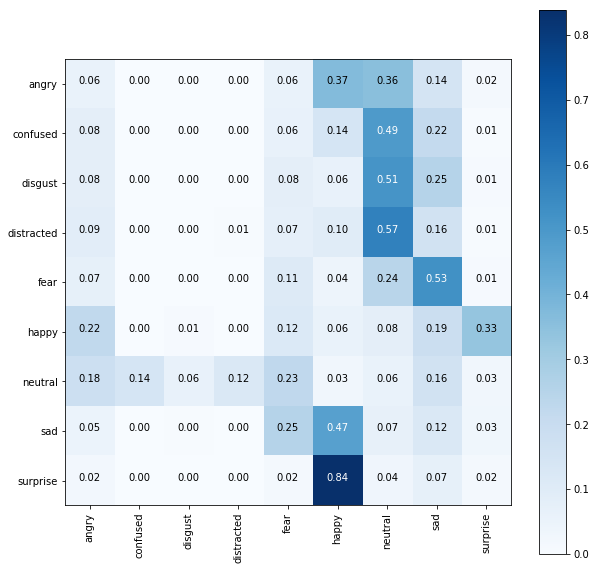

In [20]:
## July 6 --> Tracey kick off the run till here.... continue below once training is done....
# import itertools
# cm=cnf_matrix
# cm = cm.astype('float') / cm.sum(axis=1)[:,None]
# plt.figure(figsize=(10,10))
# plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
# plt.colorbar()
# tick_marks = np.arange(len(classes))
# _ = plt.xticks(tick_marks, classes, rotation=90)
# _ = plt.yticks(tick_marks, classes)

# fmt = '.2f'
# thresh = cm.max() / 2.
# for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#     plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")

In [198]:
# test=cnf_matrix
# test1 = test / test.sum(axis=1)
# test1

array([[0.05, 0.  , 0.02, 0.  , 0.03, 0.04, 0.15, 0.29, 0.37],
       [0.01, 0.  , 0.  , 0.  , 0.01, 0.01, 0.01, 0.01, 0.14],
       [0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.09],
       [0.01, 0.  , 0.  , 0.  , 0.01, 0.01, 0.01, 0.01, 0.1 ],
       [0.39, 0.46, 0.23, 0.01, 0.02, 0.05, 0.16, 0.18, 0.03],
       [0.15, 0.57, 0.54, 0.92, 0.15, 0.27, 0.21, 0.32, 0.18],
       [0.03, 0.  , 0.02, 0.  , 0.01, 0.55, 0.06, 0.08, 0.03],
       [0.06, 0.  , 0.04, 0.01, 0.01, 0.12, 0.53, 0.17, 0.02],
       [0.04, 0.  , 0.07, 0.  , 0.01, 0.04, 0.22, 0.34, 0.01]])

In [171]:
print(validation_generator.class_indices)

{'neutral': 6, 'angry': 0, 'happy': 5, 'distracted': 3, 'confused': 1, 'disgust': 2, 'fear': 4, 'sad': 7, 'surprise': 8}


In [21]:
from sklearn.metrics import classification_report, confusion_matrix
class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

       angry       0.06      0.06      0.06       960
    confused       0.00      0.00      0.00       162
     disgust       0.00      0.00      0.00       111
  distracted       0.01      0.01      0.01       164
        fear       0.11      0.11      0.11      1018
       happy       0.06      0.06      0.06      1825
     neutral       0.06      0.06      0.06      1216
         sad       0.09      0.12      0.11      1139
    surprise       0.02      0.02      0.02       797

    accuracy                           0.07      7392
   macro avg       0.05      0.05      0.05      7392
weighted avg       0.06      0.07      0.07      7392



In [23]:
# show the confusion matrix of our predictions

# compute predictions
# predictions = model.predict_generator(generator=validation_generator, steps=57.484375)
# y_pred = [np.argmax(probas) for probas in predictions]
# y_test = validation_generator.classes
# class_names = validation_generator.class_indices.keys()

# from sklearn.metrics import confusion_matrix
# import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# compute confusion matrix
# cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()

NameError: name 'class_names' is not defined

<Figure size 432x288 with 0 Axes>